# 图像阈值分割

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [5]:
src = cv2.imread('../datas/f4.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
rgb_f = rgb.astype(np.float32)

In [6]:
def threshold(img,min_val,max_val,method):
    dst = np.zeros_like(img)
    dst = cv2.threshold(img,min_val,max_val,method)
    return dst

In [7]:
def adativeThreshold(img,max_val,method,thresh_type,block_size,C):
    dst = np.zeros_like(img)
    dst = cv2.adaptiveThreshold(img,max_val,method,thresh_type,block_size,C)
    return dst

## 1.THRESH_BINARY类型

Text(0.5,1,'Thresh Binary')

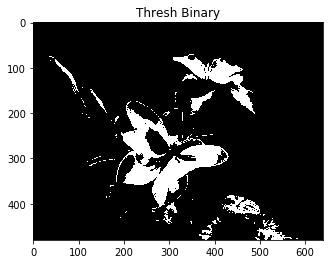

In [8]:
thresh_val,dst = threshold(gray,200,255,cv2.THRESH_BINARY)
plt.imshow(dst,'gray')
plt.title('Thresh Binary')

## 2.THRESH_BINARY_INV类型

Text(0.5,1,'Thresh Binary Inverse')

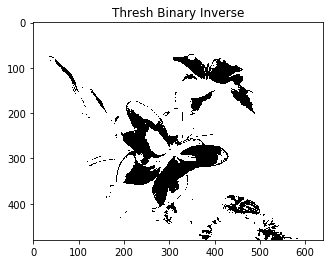

In [9]:
thresh_val,dst = threshold(gray,200,255,cv2.THRESH_BINARY_INV)
plt.imshow(dst,'gray')
plt.title('Thresh Binary Inverse')

## 3.THRESH_TRUNC类型

Text(0.5,1,'Thresh TRUNC')

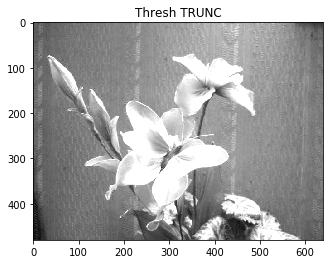

In [10]:
thresh_val,dst = threshold(gray,200,255,cv2.THRESH_TRUNC)
plt.imshow(dst,'gray')
plt.title('Thresh TRUNC')

## 4.THRESH_TOZERO类型

Text(0.5,1,'Thresh TOZERO')

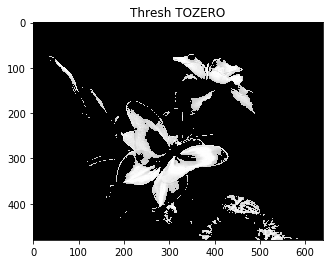

In [11]:
thresh_val,dst = threshold(gray,200,255,cv2.THRESH_TOZERO)
plt.imshow(dst,'gray')
plt.title('Thresh TOZERO')

## 5.THRESH_TOZERO_INV类型

Text(0.5,1,'Thresh TOZERO Inverse')

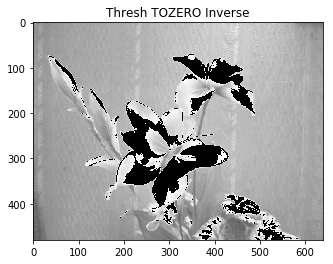

In [12]:
thresh_val,dst = threshold(gray,200,255,cv2.THRESH_TOZERO_INV)
plt.imshow(dst,'gray')
plt.title('Thresh TOZERO Inverse')

## 6.THRESH_OTSU类型

Text(0.5,1,'Thresh OTS')

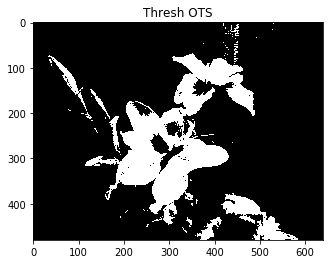

In [13]:
thresh_val,dst = threshold(gray,200,255,cv2.THRESH_OTSU)
plt.imshow(dst,'gray')
plt.title('Thresh OTS')

## 7.组合使用

Text(0.5,1,'Thresh OTS and Thresh Binary')

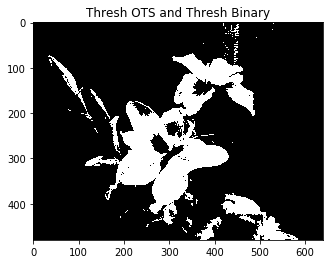

In [14]:
thresh_val,dst = threshold(gray,200,255,cv2.THRESH_OTSU | cv2.THRESH_BINARY)
plt.imshow(dst,'gray')
plt.title('Thresh OTS and Thresh Binary')

## 8.THRESH_TRIANGLE

Text(0.5,1,'Thresh Triangle')

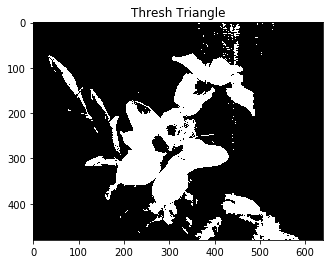

In [15]:
thresh_val,dst = threshold(gray,200,255,cv2.THRESH_TRIANGLE)
plt.imshow(dst,'gray')
plt.title('Thresh Triangle')

## 9.自适应图像阈值分割

Text(0.5,1,'Thresh Triangle')

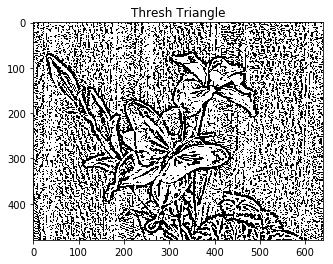

In [16]:
dst = adativeThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(dst,'gray')
plt.title('Thresh Triangle')

Text(0.5,1,'Thresh Gaussian')

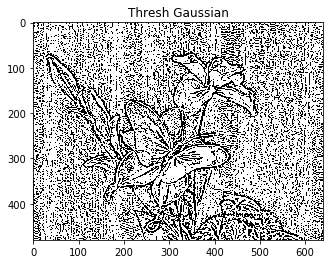

In [17]:
dst = adativeThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(dst,'gray')
plt.title('Thresh Gaussian')

## 10.双阈值化

Text(0.5,1,'Double Threshold')

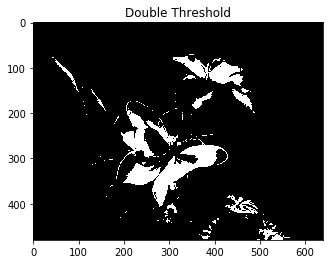

In [18]:
low_thresh = 150
high_thresh = 210

_,dst1 = cv2.threshold(gray,low_thresh,255,cv2.THRESH_BINARY)
_,dst2= cv2.threshold(gray,high_thresh,255,cv2.THRESH_BINARY)
dst = cv2.bitwise_and(dst1,dst2)
plt.imshow(dst,'gray')
plt.title('Double Threshold')

# 11.最大熵阈值分割

参考:
[1].《OpenCV图像处理编程实例》.朱伟

In [19]:
# 计算当前位置的能量熵
def caculate_current_entropty(hist,threshold):
    background_sum = 0.
    target_sum = 0.
    background_entropty = 0.
    target_entropty = 0.
    for i in range(256):
        if i < threshold:
            background_sum += hist[i]
        else:
            target_sum += hist[i]
    for i in range(256):
        if i < threshold:
            if hist[i] == 0:
                continue
            ratio1 = hist[i] / background_sum
            background_entropty += - ratio1 * np.log(ratio1)
        else:
            if hist[i] == 0:
                continue
            ratio2 = hist[i] / target_sum
            target_entropty += -ratio2 * np.log(ratio2)
    return target_entropty + background_entropty

In [20]:
# 寻找最大熵并分割
def max_entropty_segmentation(src):
    hist = cv2.calcHist([gray],  
    [0], #使用的通道  
    None, #没有使用mask  
    [256], #HistSize  
    [0.0,255.0]) #直方图柱的范围 
    max_entropty = 0.
    max_idx = 0
    for i in range(256):
        cur_entropty = caculate_current_entropty(hist,i)
        if cur_entropty > max_entropty:
            max_entropty = cur_entropty
            max_idx = i
            
    # 二值化分割
    _,result = cv2.threshold(src,max_idx,255,cv2.THRESH_BINARY)
    return result

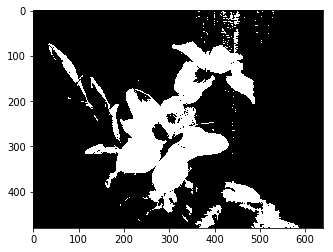

In [22]:
dst = max_entropty_segmentation(gray)
plt.imshow(dst,'gray')